# 필요한 데이터 로드

In [ ]:
from google.colab import drive

import pandas as pd
import geopandas as gpd

# basepath
dir_path = "/content/drive/MyDrive/2024-02-machine-learning/data"

# mount drive
drive.mount('/content/drive')

# foot traffic file path
foot_traffic_path = f"{dir_path}/foot_traffic_dongdaemun_with_geolocation.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_foot_traffic = gpd.read_file(foot_traffic_path)

# 해야 할 일
- 20대와 그 외 연령대들의 이동 패턴이 차이가 있을까? 를 확인해보기

# 어떻게 확인할 것인가?

## 생각해보았을 때
- 연령대별로 데이터를 나눈다.
- 각 연령대별 위치정보 + 데이터를 시각화한다.
  - 각 연령대 별 색상을 정한다.
  - 유동인구가 많을수록 색상의 opacity 를 진하게 표현한다.
  - 지도 위에 시각화 정보들을 겹쳐본다.

## best practice 는 무엇인가?
- Choropleth maps 로 나타내기
- KDE + heatmap 으로 나타내기
- folium 으로 나타내기

## 분석

### 데이터 전처리
- `AGRDE_CD` 가 0인 데이터는 전 연령대이므로 제외한다.
- `DAYWEEK_CD` 는 계속 했던 주중 데이터만을 갖고 진행할 예정이니 1로 filter 한다.
- `TMZON_CD` 는 전체 시간대를 확인할 것이므로 0인 값을 고른다.

In [ ]:
df_foot_traffic

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO,x,y
0,201601,57447,11230,11230536,1,0,0,238.162875,126.91575295032034,37.58105157348146
1,201601,57447,11230,11230536,1,0,1,0.0,126.91575295032034,37.58105157348146
2,201601,57447,11230,11230536,1,0,2,37.109375,126.91575295032034,37.58105157348146
3,201601,57447,11230,11230536,1,0,3,66.91925,126.91575295032034,37.58105157348146
4,201601,57447,11230,11230536,1,0,4,67.5075,126.91575295032034,37.58105157348146
...,...,...,...,...,...,...,...,...,...,...
10912540,201609,34608,11230,11230750,2,60,2,2.66,126.95077182191889,37.601299024966494
10912541,201609,34608,11230,11230750,2,60,3,3.62,126.95077182191889,37.601299024966494
10912542,201609,34608,11230,11230750,2,60,4,3.575,126.95077182191889,37.601299024966494
10912543,201609,34608,11230,11230750,2,60,5,5.62,126.95077182191889,37.601299024966494


In [ ]:
df_foot_traffic['geometry'] = gpd.points_from_xy(df_foot_traffic['x'], df_foot_traffic['y'])

In [ ]:
df_foot_traffic

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO,x,y,geometry
0,201601,57447,11230,11230536,1,0,0,238.162875,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
1,201601,57447,11230,11230536,1,0,1,0.0,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
2,201601,57447,11230,11230536,1,0,2,37.109375,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
3,201601,57447,11230,11230536,1,0,3,66.91925,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
4,201601,57447,11230,11230536,1,0,4,67.5075,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
...,...,...,...,...,...,...,...,...,...,...,...
10912540,201609,34608,11230,11230750,2,60,2,2.66,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)
10912541,201609,34608,11230,11230750,2,60,3,3.62,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)
10912542,201609,34608,11230,11230750,2,60,4,3.575,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)
10912543,201609,34608,11230,11230750,2,60,5,5.62,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)


# 데이터 전처리
- 전 연령대 데이터는 제외하고, 그 중에서 주중 / 모든 시간대 데이터만을 추출

In [ ]:
df_foot_traffic_weekday = df_foot_traffic[
  (df_foot_traffic['DAYWEEK_CD'] == '1') & (df_foot_traffic['TMZON_CD'] == '0') & (df_foot_traffic['AGRDE_CD'] != '0')
]

In [ ]:
df_foot_traffic_weekday

,STDR_YM_CD,RD_LINK_ID,SIGNGU_CD,ADSTRD_CD,DAYWEEK_CD,AGRDE_CD,TMZON_CD,FLPOP_CO,x,y,geometry
7,201601,57447,11230,11230536,1,10,0,0.0,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
14,201601,57447,11230,11230536,1,20,0,27.594625,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
21,201601,57447,11230,11230536,1,30,0,31.608125,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
28,201601,57447,11230,11230536,1,40,0,49.769875,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
35,201601,57447,11230,11230536,1,50,0,63.653125,126.91575295032034,37.58105157348146,POINT (126.91575 37.58105)
...,...,...,...,...,...,...,...,...,...,...,...
10912461,201609,34608,11230,11230750,1,20,0,24.3215,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)
10912468,201609,34608,11230,11230750,1,30,0,32.281,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)
10912475,201609,34608,11230,11230750,1,40,0,41.2205,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)
10912482,201609,34608,11230,11230750,1,50,0,39.24,126.95077182191889,37.601299024966494,POINT (126.95077 37.6013)


In [ ]:
# get datatype info of cols

df_foot_traffic_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668166 entries, 7 to 10912489
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STDR_YM_CD  668166 non-null  object  
 1   RD_LINK_ID  668166 non-null  object  
 2   SIGNGU_CD   668166 non-null  object  
 3   ADSTRD_CD   668166 non-null  object  
 4   DAYWEEK_CD  668166 non-null  object  
 5   AGRDE_CD    668166 non-null  object  
 6   TMZON_CD    668166 non-null  object  
 7   FLPOP_CO    668166 non-null  object  
 8   x           668166 non-null  object  
 9   y           668166 non-null  object  
 10  geometry    668166 non-null  geometry
dtypes: geometry(1), object(10)
memory usage: 61.2+ MB


In [ ]:
# set FLPOP_CO type to float

df_foot_traffic_weekday['FLPOP_CO'] = df_foot_traffic_weekday['FLPOP_CO'].astype(float)

<ipython-input-9-68ab06ffd456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foot_traffic_weekday['FLPOP_CO'] = df_foot_traffic_weekday['FLPOP_CO'].astype(float)


In [ ]:
df_foot_traffic_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668166 entries, 7 to 10912489
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STDR_YM_CD  668166 non-null  object  
 1   RD_LINK_ID  668166 non-null  object  
 2   SIGNGU_CD   668166 non-null  object  
 3   ADSTRD_CD   668166 non-null  object  
 4   DAYWEEK_CD  668166 non-null  object  
 5   AGRDE_CD    668166 non-null  object  
 6   TMZON_CD    668166 non-null  object  
 7   FLPOP_CO    668166 non-null  float64 
 8   x           668166 non-null  object  
 9   y           668166 non-null  object  
 10  geometry    668166 non-null  geometry
dtypes: float64(1), geometry(1), object(9)
memory usage: 61.2+ MB


- 측정시점(`STDR_YM_CD`), 도로코드(`RD_LINK_ID`), 그리고 연령대(`AGRDE_CD`)로 groupby
- 유동인구의 평균 계산 (mean on `FLPOP_CO`)

메모리를 너무 많이 잡아먹어서 일단은 `df_foot_traffic_weekday` 를 csv 로 저장한 뒤, runtime 을 재연결하고 저장한 파일을 불러와 다시 분석 시작.

In [ ]:
df_foot_traffic_weekday.to_csv(f"{dir_path}/foot_traffic_weekday_by_age_with_geolocation_data.csv")

# 데이터 전처리 후 분석 재시작

In [ ]:
df_foot_traffic_weekday = gpd.read_file(f"{dir_path}/foot_traffic_weekday_by_age_with_geolocation_data.csv")

In [ ]:
df_foot_traffic_weekday['FLPOP_CO'] = df_foot_traffic_weekday['FLPOP_CO'].astype(float)

In [ ]:
df_aggregated_foot_traffic_mean = df_foot_traffic_weekday.groupby(
  ['RD_LINK_ID', 'AGRDE_CD', 'x', 'y']
)['FLPOP_CO'].mean().reset_index()

In [ ]:
df_aggregated_foot_traffic_mean

,RD_LINK_ID,AGRDE_CD,x,y,FLPOP_CO
0,31203,10,127.05846697731907,37.60665595314724,0.938000
1,31203,20,127.05846697731907,37.60665595314724,5.599500
2,31203,30,127.05846697731907,37.60665595314724,14.011500
3,31203,40,127.05846697731907,37.60665595314724,22.683000
4,31203,50,127.05846697731907,37.60665595314724,18.024000
...,...,...,...,...,...
81667,86219,20,127.09503883343346,37.56011201349107,1.634450
81668,86219,30,127.09503883343346,37.56011201349107,7.796944
81669,86219,40,127.09503883343346,37.56011201349107,10.587224
81670,86219,50,127.09503883343346,37.56011201349107,13.460714


계산이 가능하도록 각 col들을 integer, floating point 로 변경해준다.

In [ ]:
df_aggregated_foot_traffic_mean['RD_LINK_ID'] = df_aggregated_foot_traffic_mean['RD_LINK_ID'].astype(int)
df_aggregated_foot_traffic_mean['AGRDE_CD'] = df_aggregated_foot_traffic_mean['AGRDE_CD'].astype(int)
df_aggregated_foot_traffic_mean['x'] = df_aggregated_foot_traffic_mean['x'].astype(float)
df_aggregated_foot_traffic_mean['y'] = df_aggregated_foot_traffic_mean['y'].astype(float)
df_aggregated_foot_traffic_mean['FLPOP_CO'] = df_aggregated_foot_traffic_mean['FLPOP_CO'].astype(float)

# 결과 시각화

In [ ]:
!pip install folium

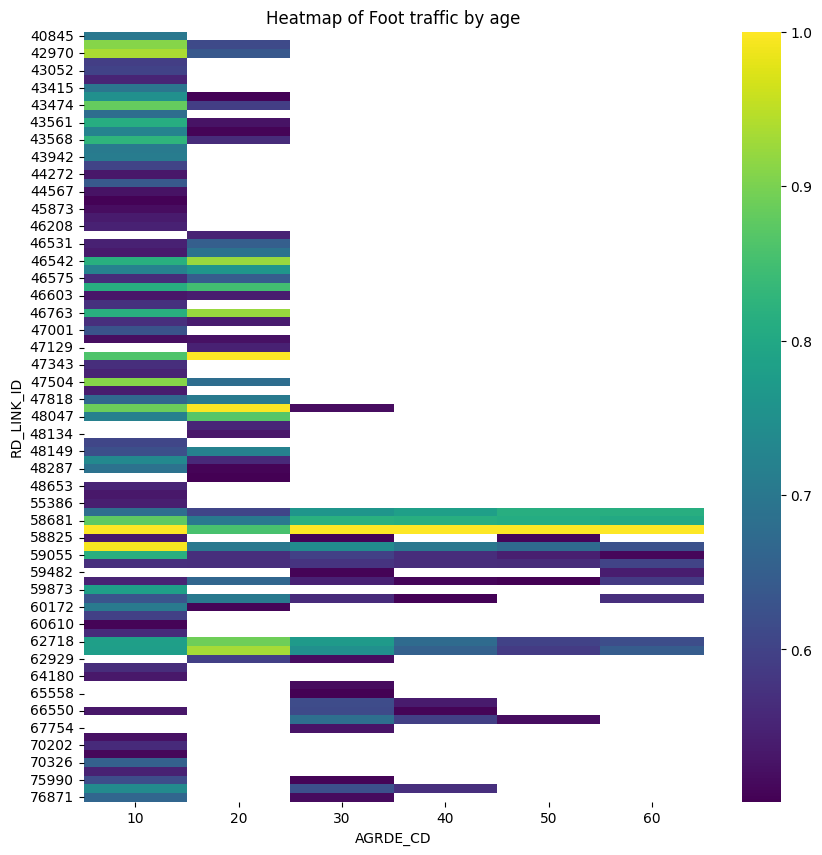

memlimit 으로 분석한 코드가 날아가서 결과만 재작성

# 분석방법
- 연령대별로 묶은 뒤, minmax scaler 로 유동인구 scaling
- 도로링크id 와 연령대를 축으로 하여 유동인구 heatmap 그림
- 사진과 같은 결과가 나왔고, 10대 / 20대 / 30대 이후 로 크게 나뉘는 양상을 확인할 수 있었음